<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA 2: Limpieza y análisis

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas. Para hacer esta práctica tendréis que trabajar en grupos de 2 personas.

Tendréis que entregar un solo archivo con el enlace Github (https://github.com) donde haya las soluciones incluyendo los nombres de los componentes del equipo. Podéis utilizar la Wiki de Github para describir vuestro equipo y los diferentes archivos que corresponden a vuestra entrega. Cada miembro del equipo tendrá que contribuir con su usuario Github. Podeís utilizar estos ejemplos como guía:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Trabajo realizado por:</strong> 
    
    - César Irnán Sillero
    - Lissette Muñoz Guillen
</div>

In [1]:
#Carga de librerias y paquetes a utilizarse

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Descripción del set de datos

<div style="background-color: #F4F6F6;">
    <hr>
Se ha seleccionado un conjunto de datos que contiene variables numéricas que miden la calidad del vino con un puntaje entre 0 y 10.
 
    1 - fixed_acidity: Cantidad de acidez fija, acidez total menos los ácidos volátiles (varibale numérica)
    2 - volatile acidity: Cantidad de acidez volatil (variable numérica)
    3 - citric acid: Cantidad de ácido cítrico (variable numérica)
    4 - residual sugar: Cantidad de azucar residual (variable numérica)
    5 - chlorides: Cantidad de cloruros de sodio (variable numérica)
    6 - free sulfur dioxide: Cantidad de díoxido de azufre libre (variable numérica)
    7 - total sulfur dioxide: Cantidad de díoxido de azufre total (variable numérica)
    8 - density: Densidad del vino (variable numérica)
    9 - pH: Medida de la acidez del vino (variable numérica)
    10 - sulphates: Cantidad de sulfato de potasio (variable numérica)
    11 - alcohol: Porcentaje por volumen (variable numérica)
   
    
La variable "target" 
    
    12 - quality: Puntuación entre 0 y 10
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Objetivos:</strong> 
</div>

<div style="background-color: #F4F6F6;">
 
    
Los objetivos concretos de esta práctica son:
    
    - Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco 
      conocidos dentro de contextos más amplios o multidisciplinares.
    - Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar 
      a cabo un proyecto analítico.
    - Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.
    - Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el 
      proceso analítico.
    - Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de  
      aplicación.
    - Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en 
      gran medida autodirigido o autónomo.
    - Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.
    
</div>

# 2. Integración y selección de los datos de interés a analizar.

<hr>
<div style="background-color: #F4F6F6;">
Se ha seleccionado este conjunto de datos considerando la variedad de información con la que cuenta en sus distintas variables. Al ser todas las variables continuas, nos permiten hacer diferentes analisis de clasificación o regresión, con la variable objetivo nos indica una clasificación ordenada de calidad de vino, es decir, nos indica que tan normal es un vino, más no específicamente un valor alto o bajo no indica si un vino es excelente o malo. 

Al contar con una cantidad de variables considerable, nos da una mayor visión y permite hacer un analisis y limpieza de datos más amplia, ya que todas las variables podrían o no influir para una variante del vino tinto. 
    
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Carga de los datos:</strong> 
</div>

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<div style="background-color: #F4F6F6;">
Realizaremos las operaciones básicas de estadistica descriptiva para todas las variables.
</div>

In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div style="background-color: #F4F6F6;">
Se cuenta con un total de 1599 registros, todas las variables tienen valores con decimales y la variable quality tiene valores enteros con un mínimo de 3 y un máximo de 8, es decir, la calidad de vino para estos datos esta divido en valores entre 3 y 8.

Además, en la tabla que vemos en la parte de arriba se tiene el detalle del valor mínimo, máximo, media, desviación estándar y cuartiles de cada una de las variables, lo que nos da una idea general de como estan distribuidos los datos. 
</div>

# 3. Limpieza de datos.

<hr>
<div style="background-color: #F4F6F6;">
Con la carga de los datos, tenemos un set con 12 variables tienen los diferentes valores de los componentes químicos de un vino.

Inicialmente exploraremos y haremos una limpieza de todas las variables.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Tratamiento de datos con ceros o elementos vacios</strong> 
</div>

<div style="background-color: #F4F6F6;">
Es común encontrar en los conjuntos de datos valores con elementos vacios o valores ceros que no son parte de los datos normales. Este hecho se puede dar por varias razones: porque estos datos no existen, no se registraron correctamente o un error de computo, es importante analizar estos datos ya que podrían causar errores en nuestros análisis.

Este tipo de datos pueden tratarse de las siguientes formas:

    - Eliminar las variables con un porcentaje alto de valores vacíos
    - Eliminar las filas con variables no disponibles
    - Imputar los datos o llenarlos con un valor por defecto
    
Entonces buscaremos los valores nulos en nuestro conjunto de datos con la función isnull().
</div>

In [4]:
wine_check=wine.isnull()
print(wine_check)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [5]:
wine.isnull().values.any()

False

<div style="background-color: #F4F6F6;">
Podemos observar que nuestro conjunto de datos no tiene valores nulos. La función anterior nos devolviera TRUE si existiera algún NaN en el DataFrame.

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Identificación y tratamiento de valores extremos</strong> 
</div>

<div style="background-color: #F4F6F6;">
Los valores extremos o tambien conocidos por su término en ingles "outliers", decimos que son los valores que se escapan al rango en donde se 
concentran la mayoría de muestras. Es necesario detectar esos valores, ya que pueden afectar considerablemente a los resultados que pueda
obtener el modelo, por ejemplo, para una regresión puede causar un efecto negativo en las predicciones.

Aún con estas consideraciones, los valores extremos pueden significar:

    1. Un error: Si existen valores fuera de la realidad como por ejemplo en un grupo de edades de personas, tener un
       registro con 170 años, lo que nos indicaría que es un error de carga de datos. 
    
    2. Limites: En otros casos, podemos tener valores que se escapan del “grupo medio”, pero queremos mantener el dato
       modificado, para que no perjudique modelo.
    
    3. Punto de Interés: Datos “anómalos” que pueden mantenerse o eliminarse de nuestros datos dependiendo cual sea el
       objetivo. Este no representa un error, puede ser un indicador de falta de datos.
   
Para identificar estos outliers en nuestro set de datos, vamos a representar cada una de las variables con un diagrama de
de caja con la función sns.boxplot, además, en la parte superior de cada gráfica mostraremos los cuartiles superior e inferior, así como la media de cada una de las variables.

De esta manera analizaremos cada variable y se dará el respectivo tratamiento a los valores extremos.

</div>

Cuartil inferior: 7.1  Cuartil superior: 9.2  Media: 8.319637273295838


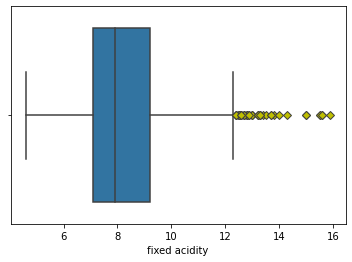

In [6]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["fixed acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["fixed acidity"], 0.75))
iqrI =(np.quantile(wine["fixed acidity"], 0.25))
m=wine["fixed acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
De acuerdo a esta gráfica, tenemos muchos valores atípicos, que estan en el rango entre 12 y 16. Los valores de acidez fija pueden ser muy variantes en el vino por lo que en este caso dejaremos estos valores en nuestro conjunto de datos para ser parte del análisis.
</div>

Cuartil inferior: 0.39  Cuartil superior: 0.64  Media: 0.5278205128205131


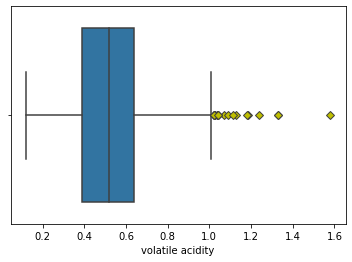

In [7]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["volatile acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["volatile acidity"], 0.75))
iqrI =(np.quantile(wine["volatile acidity"], 0.25))
m=wine["volatile acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'volatile acidity' se tiene varios valores atípicos en un rango de 1 y 1.4, quedando un solo valor cerca de 1.6. En el caso de la acidez volatil del vino, de acuerdo a (www.catadelvino.com) "La calidad de un vino es mayor cuanto menor es su acidez volátil", lo que podríamos considerar que este único valor atípico de 1.6 podría interferir en nuestro analisis, considerando los valores medios y cuartiles. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [8]:
ma=wine["volatile acidity"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['volatile acidity']==ma].index)

Valor atípico a eliminarse: 1.58


Cuartil inferior: 0.09  Cuartil superior: 0.42  Media: 0.2711451814768449


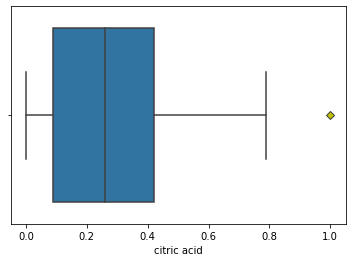

In [9]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["citric acid"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["citric acid"], 0.75))
iqrI =(np.quantile(wine["citric acid"], 0.25))
m=wine["citric acid"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Se nos presenta en este caso también un único valor atipico, que se encuentra lejos de nuestra media. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [10]:
ma=wine["citric acid"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['citric acid']==ma].index)

Valor atípico a eliminarse: 1.0


Cuartil inferior: 1.9  Cuartil superior: 2.6  Media: 2.5385410144020057


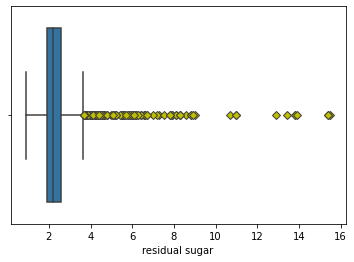

In [11]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["residual sugar"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["residual sugar"], 0.75))
iqrI =(np.quantile(wine["residual sugar"], 0.25))
m=wine["residual sugar"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Al igual que en la variable acidez total, se presenta una gran cantidad de valores atípicos, en este caso la cantidad de azucar residual en el vino entre los valores de 4 a 16 son normales, por lo que no es necesario tratarlos, pues estos valores ayudarán a identificar la calidad del vino en los analisis posteriores.
</div>

Cuartil inferior: 0.07  Cuartil superior: 0.09  Media: 0.08710832811521577


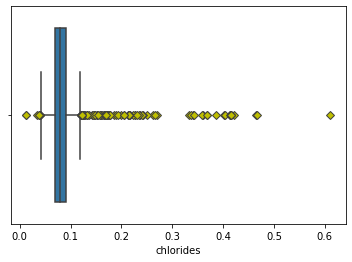

In [12]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["chlorides"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["chlorides"], 0.75))
iqrI =(np.quantile(wine["chlorides"], 0.25))
m=wine["chlorides"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Para este caso, tenemos al igual que en la mayoria de las variables muchos valores atípicos de acuerdo al gráfico de caja, sin embargo, existe un solo valor extremo que se aleja demasiado de la media. Así que aplicaremos el mismo tratamiendo que en los otros casos, eliminandolo de nuestro conjunto.
</div>

In [13]:
ma=wine["chlorides"].max()
print ("chlorides:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['chlorides']==ma].index)

chlorides: 0.611


Cuartil inferior: 7.0  Cuartil superior: 21.0  Media: 15.8765664160401


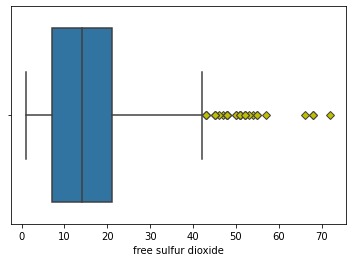

In [14]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["free sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["free sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["free sulfur dioxide"], 0.25))
m=wine["free sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'free sulfur dioxide', se observa en especial 3 valores atípicos que se encuentan lejos de la media. Sin embargo, investigando en (https://www.infoagro.com/instrumentos_medida/doc_sulfuroso_vino.asp?k=1), muestra una tabla donde los valores de 40 y 70 de SULFUROSO no son valores anormales en un vino, por lo que en este caso no aplicaremos ningún tratamiento.
</div>

Cuartil inferior: 22.0  Cuartil superior: 62.0  Media: 46.478070175438596


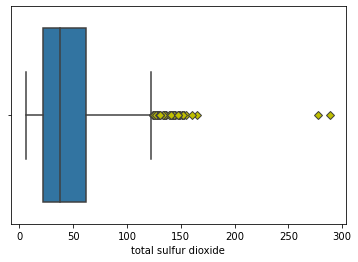

In [15]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["total sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["total sulfur dioxide"], 0.25))
m=wine["total sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
En esta variable, tenemos dos valores que se encuentran demasiado alejados de la media, por lo que sí podrían causar ruído en nuestro analsis. 
<hr>
    
Eliminaremos estos dos valores de nuestro conjunto de datos.
</div>

In [16]:
ma=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

#Ahora el segundo
ma1=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 2:", ma1)
wine = wine.drop(wine[wine['total sulfur dioxide']==ma1].index)

Valor atípico a eliminarse 1: 289.0
Valor atípico a eliminarse 2: 278.0


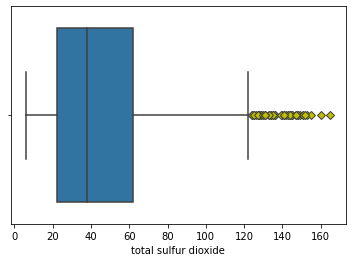

In [17]:
#Graficamos nuevamente, con los extremos eliminados
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)


Cuartil inferior: 3.21  Cuartil superior: 3.4  Media: 3.3118883312421583


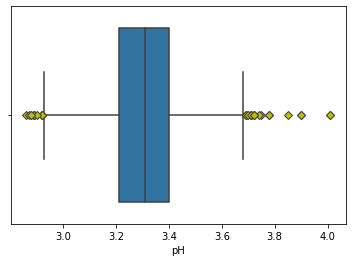

In [18]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["pH"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["pH"], 0.75))
iqrI =(np.quantile(wine["pH"], 0.25))
m=wine["pH"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Aquí no tenemos valores muy alejados de la media, por lo que todos serán considerados para nuestro análisis posterior.
</div>

Cuartil inferior: 0.55  Cuartil superior: 0.73  Media: 0.6572772898368888


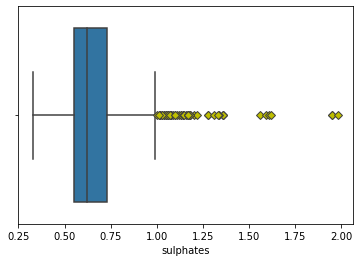

In [19]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["sulphates"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["sulphates"], 0.75))
iqrI =(np.quantile(wine["sulphates"], 0.25))
m=wine["sulphates"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para este caso, también contamos dos valores que se encuentran lejos de la media. Estos valores podrían afectar causar ruído a nuestro análisis.  

Los demás valores que se muestran como extremos en nuestra digrama de caja, son masivos por lo que serán considerados para nuestro analisis. 

<hr>
    
Trataremos únicamente los dos últimos valores extremos como en los casos anteriores eliminando de nuestro conjunto de datos.

</div>

In [20]:
ma=wine["sulphates"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

Valor atípico a eliminarse 1: 1.98


In [21]:
#Ahora el segundo
ma1=wine["sulphates"].max()
print ("Valor atípico a eliminarse 2:", ma1)
#wine = wine.drop(wine[wine['sulphates']==ma1].index)

Valor atípico a eliminarse 2: 1.98


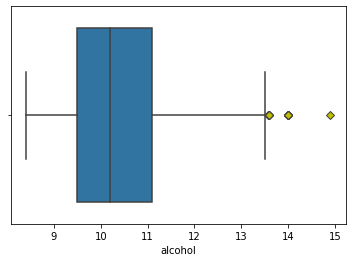

In [22]:
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["alcohol"],flierprops=green_diamond)

<div style="background-color: #F4F6F6;">
Finalmente, con la variable 'Alcohol', si bien existen tres valores fuera del rango, estos no se encuentran tan alejados de la media. Considerando que niveles altos de alcohol en un vino no son valores incorrectos, no daremos ningún tratamiento a esta variable.

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Convertir nuestra variable target a categórica</strong> 
</div>

<div style="background-color: #F4F6F6;">
Para nuestro caso es la variable "quality" que contiene la puntuación entre 0 y 10 de la calidad del vino. 

Esto nos ayudará en análisis gráficos y predicciones futuras. 
</div>

In [25]:
#primero convertirla a entera
wine['quality']=wine.quality.astype('int')

#convirtiendo a variable categorica
wine['quality']= wine['quality'].astype('category')
wine['quality'].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Resumen de la limpieza de datos</strong> 
</div>

<div style="background-color: #F4F6F6;">
Hemos realizado inicialmente una descripción general de los datos, luego una descripción estadística para avanzar hacia la limpieza, como primer punto se tiene una búsqueda de valores vacios, que no han sido encontrados en nuestro conjunto de datos. Como segundo punto se trabajó con los valores extremos, se estableció un umbral donde, se identificaban los valores (mediante diagramas de caja), que para nuestro dataset eran incorrectos o totalmente fuera de los rango normales y de la media de los demás datos, así, una vez identificados estos valores que en la mayoria de las variables era los valores más extremos, se procedio a eliminarlos. De esta manera se descartaron valores que pudieran afectar negativamente nuestro modelo posterior.

Para el caso de los valores extremos también se tienen otras técnicas que nos permiten tratar estos valores como:
    
    - Reemplazar estos valores por la media
    - Imputación de los valores mediante métodos estadísticos.
   
 
 Como último punto se realizó una conversión de variables que nos será útil para el analisis de los siguientes puntos.
</div>

# 4. Análisis gráfico.

<hr>
<div style="background-color: #F4F6F6;">
Una vez tenemos ya limpios nuestros datos, como siguiente paso realizaremos algunas gráficas que nos permitiran ver la relación entre las diferentes variables de nuestro conjunto de datos con la variable ojetivo, de esta manera podrémos identificar las variables más fuertes y débiles para nuestro analísis. 
    
Para esta exploración gráfica utilizaremos histogramas y diagramas de correlación.
    
</div>

<div style="background-color: #F4F6F6;">
Comenzaremos analizando nuestra variable objetivo de manera individual, obtenemos la frecuencia y realizamos un gráfico para ver como estan distribuidos los datos de acuerdo a la calidad del vino.
</div>

In [28]:
# tabla de frecuencia de clases de vinos
pd.value_counts(wine['quality'])

5    680
6    638
7    197
4     52
8     18
3      9
Name: quality, dtype: int64

<div style="background-color: #F4F6F6;">
<strong>Graficamos</strong>
    
</div>

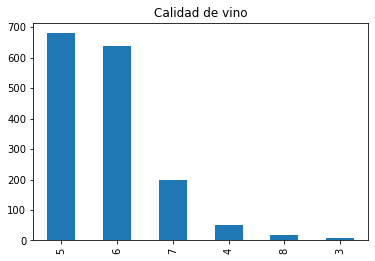

In [29]:
# Gráfico de barras de los tipos de vino
plot = wine['quality'].value_counts().plot(kind='bar',
                                            title='Calidad de vino')


<div style="background-color: #F4F6F6;">
Podemos observar que los datos tienen una mayor concentración en calidad de vino 5 y 6, luego le sigue el tipo 7. En el caso de la calidad de vino 4,8 y 3 presentan la menor cantidad de datos.
</div>

<div style="background-color: #F4F6F6;">
<strong>Variables numéricas:</strong> Graficamos los histogramas de algunas de nuestras variables.
    
</div>

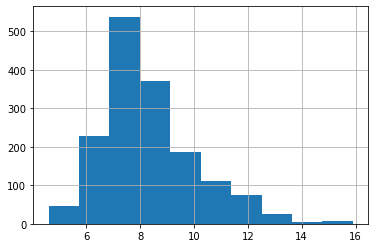

In [30]:
wine['fixed acidity'].hist() #Variable fixed acidity

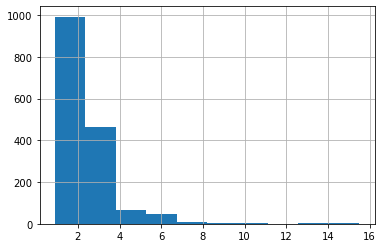

In [31]:
wine['residual sugar'].hist() #Variable residual sugar

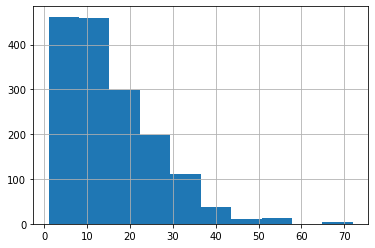

In [32]:
wine['free sulfur dioxide'].hist() #Variable free sulfur dioxide

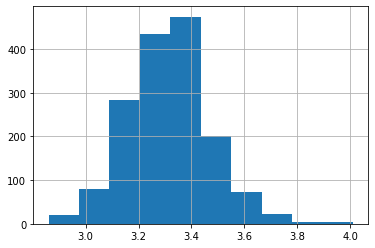

In [33]:
wine['pH'].hist() #Variable pH

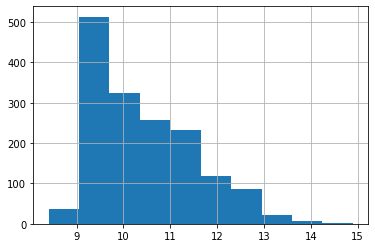

In [34]:
wine['alcohol'].hist() #Variable alcohol

<div style="background-color: #F4F6F6;">
    Analizando las gráficas se tiene que:
    
    -En el caso de la variable fixed acidity, tiene una distribución casi normal con cola hacia la derecha, la mayor concentración de los datos esta entre 6 y 10.
    
    -Para la variable residual sugar, los datos estan concentrados practicamenente a la izquierda con valores entre 1 y 4, esta variable también tiene una cola hacia la derecha.
    
    -Para la variable free sulfur dioxide, su distribución de datos se concentra en los valores entre 0 y 30, al igual que en los otros casos presenta cola hacia la derecha.
    
    -La variable pH mantiene una distribución normal y en el caso de la variable alcohol, presenta una mayor concentración de los datos en los valores entre 9 y 13.
</div>

<div style="background-color: #F4F6F6;">
<strong>Correlación entre las variables</strong> 
</div>

In [35]:
#tomamos las variables a ser analizadas, consideraremos a todas
wineD= wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
'total sulfur dioxide','density','pH','sulphates','alcohol']]

#calculamos la matriz de correlacion
correlation_matrix = wineD.corr()
correlation_matrix


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.258287,0.678129,0.116902,0.100948,-0.154736,-0.115435,0.669096,-0.688094,0.185323,-0.061101
volatile acidity,-0.258287,1.000000,-0.554948,0.009579,0.067240,-0.003720,0.096488,0.023284,0.231178,-0.264857,-0.204535
citric acid,0.678129,-0.554948,1.000000,0.134684,0.179510,-0.070726,0.014654,0.370295,-0.533921,0.299981,0.110780
residual sugar,0.116902,0.009579,0.134684,1.000000,0.065173,0.178034,0.173270,0.369428,-0.075952,0.008101,0.033648
chlorides,0.100948,0.067240,0.179510,0.065173,1.000000,0.003064,0.057189,0.206181,-0.253161,0.325629,-0.225222
free sulfur dioxide,-0.154736,-0.003720,-0.070726,0.178034,0.003064,1.000000,0.672794,-0.019294,0.079988,0.048351,-0.073684
total sulfur dioxide,-0.115435,0.096488,0.014654,0.173270,0.057189,0.672794,1.000000,0.090361,-0.048455,0.049257,-0.229132
density,0.669096,0.023284,0.370295,0.369428,0.206181,-0.019294,0.090361,1.000000,-0.345925,0.141903,-0.493684
pH,-0.688094,0.231178,-0.533921,-0.075952,-0.253161,0.079988,-0.048455,-0.345925,1.000000,-0.181623,0.208601
sulphates,0.185323,-0.264857,0.299981,0.008101,0.325629,0.048351,0.049257,0.141903,-0.181623,1.000000,0.105749


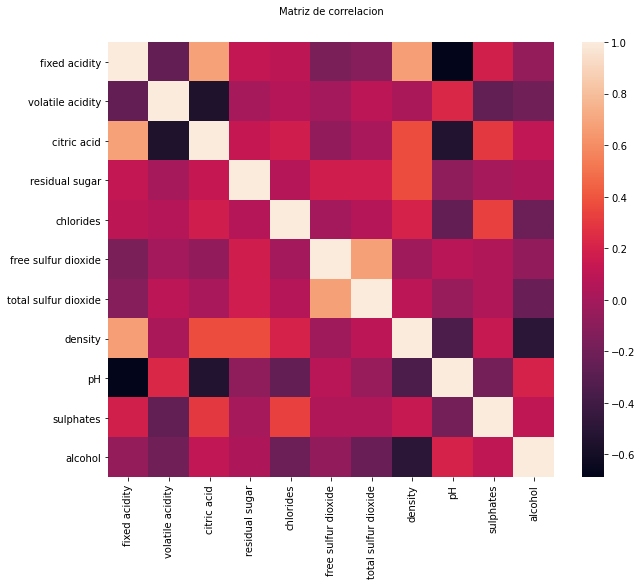

In [36]:
#Graficando
plt.figure(figsize=(10,8))
plt.title('Matriz de correlacion', y=1.05, size=10)
sns.heatmap(correlation_matrix);

<div style="background-color: #F4F6F6;">
En la matriz de correlación, podemos observar que existe una correlación entre las variables fixed acidity con citric acid  y density, así como free sulfur dioxide con total sulfur dioxide que tiene bastante lógica ya que miden un componente similar de la calidad del vino. Aún así la correción no es tan fuerte por lo que no descartaremos a ninguna de nuestras variables y consideraremos a cada una de ellas para un análisis posterior.
</div>

<div style="background-color: #F4F6F6;">
<strong>Representación gráfica de las relaciones entre algunas variables</strong> 
    <hr>
Lo haremos mediante la función "pairplot" de la librería 'seaborn' con el parámetro "hue".
</div>

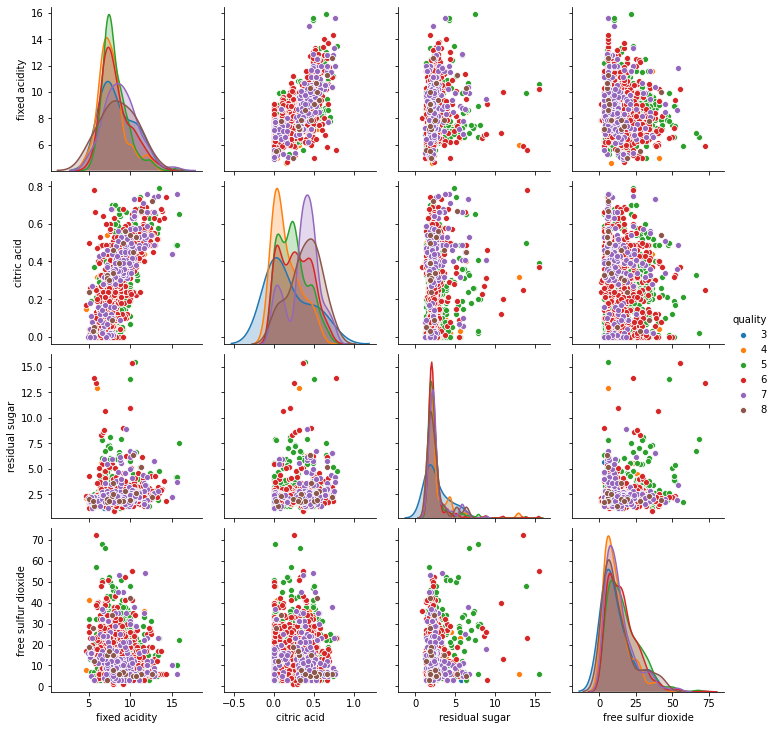

In [37]:
sns.pairplot(data=wine[['fixed acidity','citric acid','residual sugar','free sulfur dioxide','quality']],
            hue='quality', dropna=True)
    
plt.show()

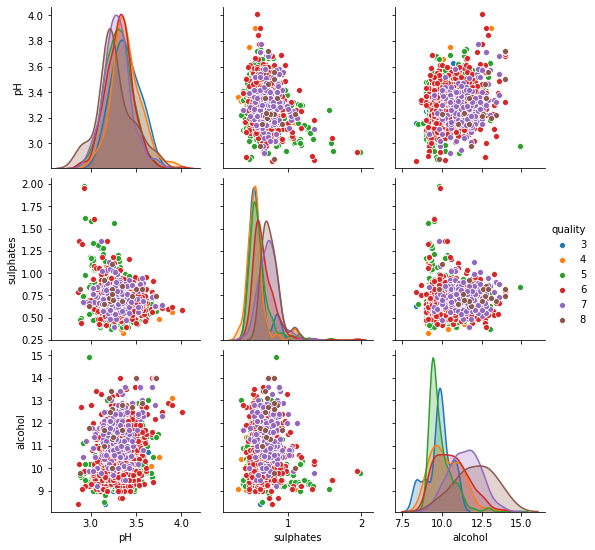

In [38]:
sns.pairplot(data=wine[['pH','sulphates','alcohol','quality']],
            hue='quality', dropna=True)
    
plt.show()

<div style="background-color: #F4F6F6;">
<strong>Resultados</strong> Luego de observar los gráficos y la matriz de correlacion, se puede ver que no existe una correlación como tal entre las variables. Sin embargo, las variables que podrían tener una tendencia a correlacionarse serían fixed acidity con citric acid y density, así como free sulfur dioxide con total sulfur dioxide; de la manera que observamos en la matriz de correlación.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exportación de los datos preprocesados</strong> 
</div>

<div style="background-color: #F4F6F6;">
Cargamos nuestro nuevo set de datos preprocesado y observamos sus primeras 10 filas.
</div>

In [39]:
dataWine = pd.read_csv("winequality-red-clean.csv")
dataWine.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [40]:
wine.to_csv("winequality-red-clean.csv")